In [2]:
!pip install pandas
!pip install openpyxl 
!pip install scikit-learn   


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# import libraries  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_excel('./dataset/Daily.xlsx')
df.head()

,Date,USD
0,1968-03-22,40.00
1,1968-03-25,40.25
2,1968-03-26,41.10
3,1968-03-27,40.35
4,1968-03-28,39.60


In [ ]:
# data filter science 2010

filtered_df = df[df['Date'] > '2010-01-01']
filtered_df.head()

,Date,USD
10404,2010-01-04,1120.00
10405,2010-01-05,1118.65
10406,2010-01-06,1138.50
10407,2010-01-07,1131.90
10408,2010-01-08,1136.10


Text(0.5, 1.0, 'Gold Data Since 2010')

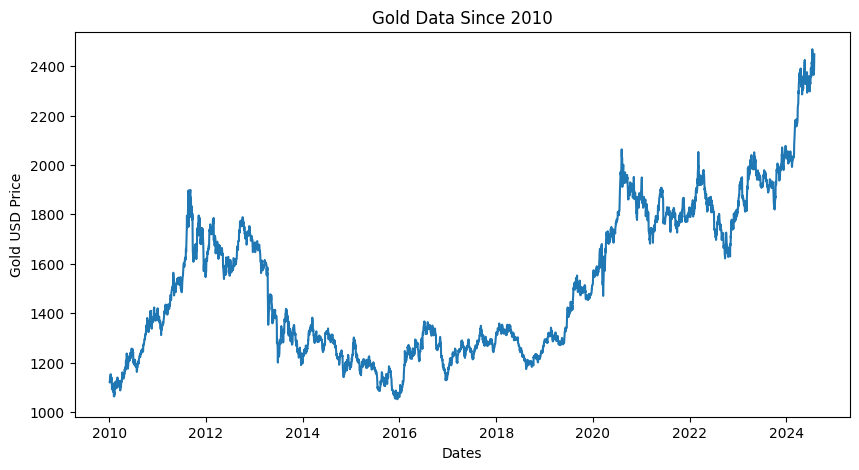

In [ ]:
#draw plot 

plt.figure(figsize=(10, 5))
plt.plot(filtered_df['Date'], filtered_df['USD'])
plt.xlabel('Dates')
plt.ylabel('Gold USD Price')
plt.title('Gold Data Since 2010')

In [7]:
# data processing 

filtered_df.isnull().sum()

Date    0
USD     0
dtype: int64

In [8]:
filtered_df

,Date,USD
10404,2010-01-04,1120.0000
10405,2010-01-05,1118.6500
10406,2010-01-06,1138.5000
10407,2010-01-07,1131.9000
10408,2010-01-08,1136.1000
...,...,...
14190,2024-07-25,2364.4995
14191,2024-07-26,2385.5750
14192,2024-07-29,2383.5371
14193,2024-07-30,2408.4300


In [9]:
# data selection 

x_train, x_test, y_train, y_test = train_test_split(filtered_df['Date'].values.reshape(-1,1), filtered_df['USD'].values, 
                                                    test_size=0.3, random_state=42)

In [10]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Flatten x_test and convert to float64
x_test_f = np.float64(x_test)

# Predict using the linear model and flatten predictions
y_predict = lm.predict(x_test_f.reshape(-1, 1)).flatten()

# Convert x_test to datetime for matching
x_test_dates = pd.to_datetime(x_test.flatten())

# Ensure 'Date' column in filtered_df is in datetime format
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Filter actual USD values by matching dates
actual_y = filtered_df[filtered_df['Date'].isin(x_test_dates)]
actual_y = actual_y.set_index('Date').reindex(x_test_dates)

# Extract the 'USD' column as a 1D array
actual_usd = actual_y['USD'].values

# Create the DataFrame with predictions and actual values
y_pred_dtl = pd.DataFrame({
    'Date': x_test_dates,
    'Actual USD': actual_usd,
    'Predicted USD': y_predict
})

y_pred_dtl

C:\Users\Prashan Kulathunga\AppData\Local\Temp\ipykernel_27824\2592122688.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


,Date,Actual USD,Predicted USD
0,2021-05-26,1896.4399,1699.280133
1,2018-09-06,1199.7700,1576.094818
2,2011-01-06,1371.0000,1228.744484
3,2022-05-09,1853.9207,1742.450817
4,2022-11-10,1754.7500,1765.400750
...,...,...,...
1133,2012-01-19,1657.2000,1275.636779
1134,2021-11-05,1816.7300,1719.500884
1135,2015-07-21,1101.0100,1434.301449
1136,2014-12-08,1202.8000,1406.389369


C:\Users\Prashan Kulathunga\AppData\Local\Temp\ipykernel_27824\1376090382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['x_test_ord'] = filtered_df['Date'].map(lambda x: x.toordinal())


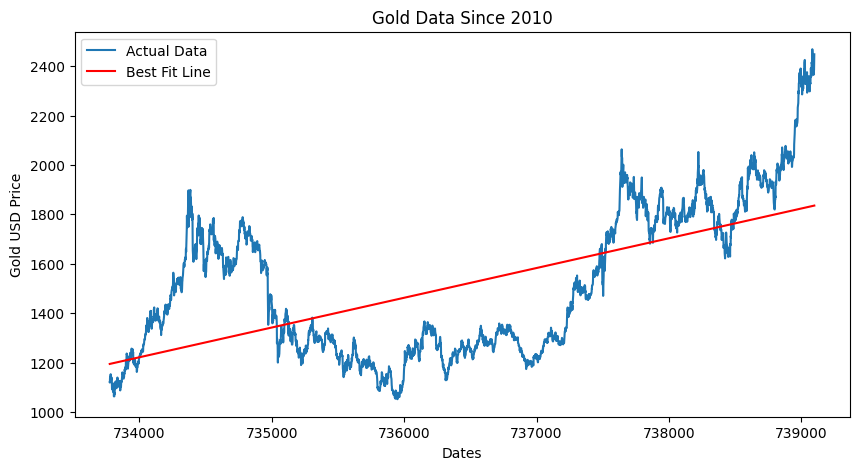

In [ ]:
# date to ordinal 
filtered_df['x_test_ord'] = filtered_df['Date'].map(lambda x: x.toordinal())

# Fit polynomial to the data
coefficients = np.polyfit(filtered_df['x_test_ord'], filtered_df['USD'], 1)

# Create a polynomial function
polynomial = np.poly1d(coefficients)

# Generate predictions
y_preds = polynomial(filtered_df['x_test_ord'])

plt.figure(figsize=(10, 5))
plt.plot(filtered_df['x_test_ord'], filtered_df['USD'], label='Actual Data')
plt.plot(filtered_df['x_test_ord'], y_preds, label='Best Fit Line', color='red')
plt.xlabel('Dates')
plt.ylabel('Gold USD Price')
plt.title('Gold Data Since 2010')
plt.legend()
plt.show()

In [13]:
# import one month data set

month_data = pd.read_excel('./dataset/month_dates.xlsx')
month_data.head()

,Date,USD
0,2024-08-01,2445.4197
1,2024-08-02,2443.2947
2,2024-08-05,2407.6475
3,2024-08-06,2389.3700
4,2024-08-07,2381.5349


In [14]:
# one month data prediction 

x_month = np.float64(month_data['Date'].values.reshape(-1, 1))
y_month_predict = lm.predict(x_month)

In [15]:
month_df = pd.DataFrame({'Date': month_data['Date'],'Actual_USD': month_data['USD'],'Predicted_USD': y_month_predict})
month_df

,Date,Actual_USD,Predicted_USD
0,2024-08-01,2445.4197,1843.554575
1,2024-08-02,2443.2947,1843.678628
2,2024-08-05,2407.6475,1844.050789
3,2024-08-06,2389.3700,1844.174843
4,2024-08-07,2381.5349,1844.298897
5,2024-08-08,2426.7478,1844.422951
6,2024-08-09,2430.9258,1844.547004
7,2024-08-12,2472.2507,1844.919165
8,2024-08-13,2465.0293,1845.043219
9,2024-08-14,2447.6421,1845.167273


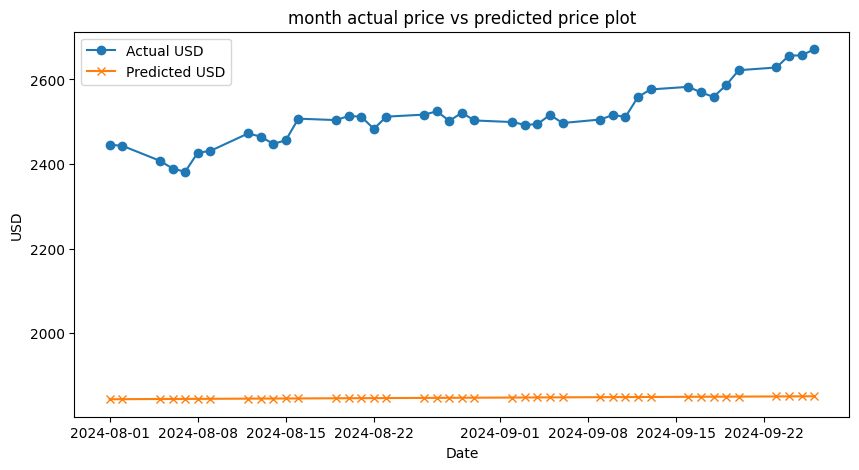

In [16]:
# month actual price vs predicted price plot

plt.figure(figsize=(10, 5))
plt.plot(month_df['Date'], month_df['Actual_USD'], marker='o', label='Actual USD')
plt.plot(month_df['Date'], month_df['Predicted_USD'], marker='x', label='Predicted USD')

plt.title('month actual price vs predicted price plot')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()

In [17]:
# mean absolute error in train data

mae_score = mean_absolute_error(y_test, y_predict)
mae_score.tolist()

206.45491683510278

In [18]:
# mean absolute error in month data

y_month = month_data['USD'].values

mae_score_month = mean_absolute_error(y_month, y_month_predict)
mae_score_month.tolist()


666.7437400202889